In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('../Dataset/clean_student_data.csv')
df.head()

,student_id,study_hours_per_week,attendance_rate,previous_grades,participation_in_extracurricular_activities,parent_education_level,passed,performance
0,S00001,12.5,75.3,75.0,Yes,Master,Yes,Medium
1,S00002,9.3,95.3,60.6,No,High School,No,Medium
2,S00003,13.2,75.3,64.0,No,Associate,No,Medium
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No,Medium
4,S00005,8.8,89.3,72.7,No,Master,No,Medium


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['participation_in_extracurricular_activities'] = le.fit_transform(df['participation_in_extracurricular_activities'])
df['parent_education_level'] = le.fit_transform(df['parent_education_level'])
df['passed'] = le.fit_transform(df['passed'])

In [19]:
x = df[['study_hours_per_week', 'attendance_rate', 'previous_grades', 'participation_in_extracurricular_activities', 'parent_education_level']]
y = df['passed']

In [20]:
x

,study_hours_per_week,attendance_rate,previous_grades,participation_in_extracurricular_activities,parent_education_level
0,12.5,75.3,75.0,1,4
1,9.3,95.3,60.6,0,3
2,13.2,75.3,64.0,0,0
3,17.6,76.8,62.4,1,1
4,8.8,89.3,72.7,0,4
...,...,...,...,...,...
39995,15.6,93.8,51.4,1,4
39996,11.3,66.4,64.2,0,2
39997,13.1,65.6,38.1,0,1
39998,14.1,74.9,65.2,1,4


In [21]:
y

0        1
1        0
2        0
3        0
4        0
        ..
39995    0
39996    1
39997    0
39998    0
39999    1
Name: passed, Length: 40000, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)
print("classification report:")
print(classification_report(y_test, y_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      3794
           1       0.53      0.54      0.53      4206

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000

confusion matrix:
[[1762 2032]
 [1933 2273]]


In [25]:
importances = model.feature_importances_
features = x.columns

In [26]:
feat_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='importance', ascending=False)

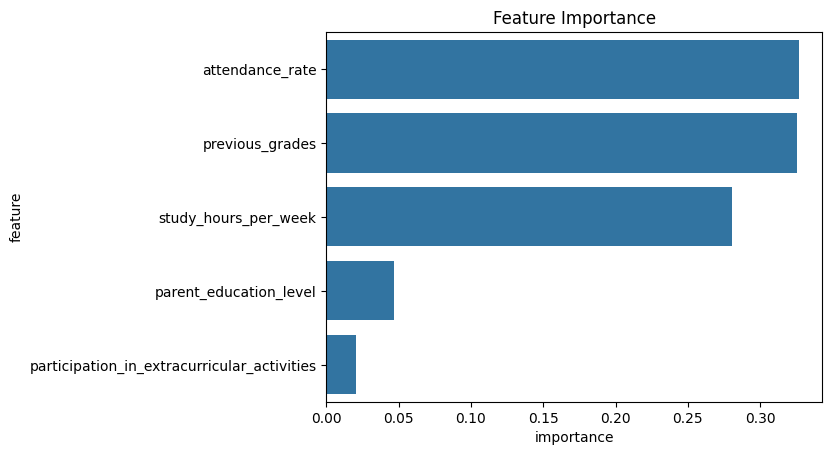

In [30]:
sns.barplot(x='importance', y='feature', data=feat_importance_df)
plt.title('Feature Importance')
plt.savefig('../images/feature_importance.png')
plt.show()

In [28]:
import joblib

joblib.dump(model, '../model/student_performance_model.pkl')

['../model/student_performance_model.pkl']